In [15]:
import pandas as pd
import os

In [16]:
def aggregate_followers():
    all_followers = []
    base_dir = "output"
    for handle in os.listdir(base_dir):
        file_path = os.path.join(base_dir, handle, "cumulative_follows.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None, names=["follower"])
            all_followers.append(df)
    return pd.concat(all_followers)

In [17]:
all_followers_df = aggregate_followers()

In [18]:
def rank_accounts(df):
    df['follower'] = df['follower'].str.lower()
    rank_df = df['follower'].value_counts().reset_index()
    rank_df.columns = ['account', 'follower_count']
    rank_df.sort_values(by='follower_count', ascending=False, inplace=True)
    return rank_df

In [19]:
ranked_accounts = rank_accounts(all_followers_df)
print(ranked_accounts)

                      account  follower_count
0                    coinbase              59
1                   consensys              50
2                     =======              48
3                    paradigm              38
4     >>>>>>> stashed changes              38
...                       ...             ...
4777               glhqjfxceu               1
4776               ee4pkrhht7               1
4775                  lnstats               1
4774                   rovnys               1
9387                kanikinsf               1

[9388 rows x 2 columns]


In [20]:
def consolidate_new_follows():
    new_follows = []
    base_dir = "output"
    for handle in os.listdir(base_dir):
        file_path = os.path.join(base_dir, handle, "incremental_updates.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None, names=["timestamp", "new_follower"])
            df["followed_by"] = handle
            new_follows.append(df)
    return pd.concat(new_follows)

In [21]:
new_follows_df = consolidate_new_follows()

In [22]:
def display_new_follows(df):
    sorted_df = df.sort_values(by="timestamp", ascending=False)
    return sorted_df

In [23]:
sorted_new_follows = display_new_follows(new_follows_df)
print(sorted_new_follows)

               timestamp     new_follower   followed_by
373  2024-05-20 20:09:13  PrimalKitchenCo  VinnyLingham
346  2024-05-20 20:09:13  new_life_crypto  VinnyLingham
371  2024-05-20 20:09:13       MIT_alumni  VinnyLingham
372  2024-05-20 20:09:13     alonshklarek  VinnyLingham
350  2024-05-20 20:09:13  PrimalBlueprint  VinnyLingham
..                   ...              ...           ...
60   2024-04-05 20:18:08       LlYvU0aA5H        0xjim_
61   2024-04-05 20:18:08             sama        0xjim_
62   2024-04-05 20:18:08          karl_0x        0xjim_
63   2024-04-05 20:18:08       BillAckman        0xjim_
66   2024-04-05 20:18:08   taprootwizards        0xjim_

[38856 rows x 3 columns]


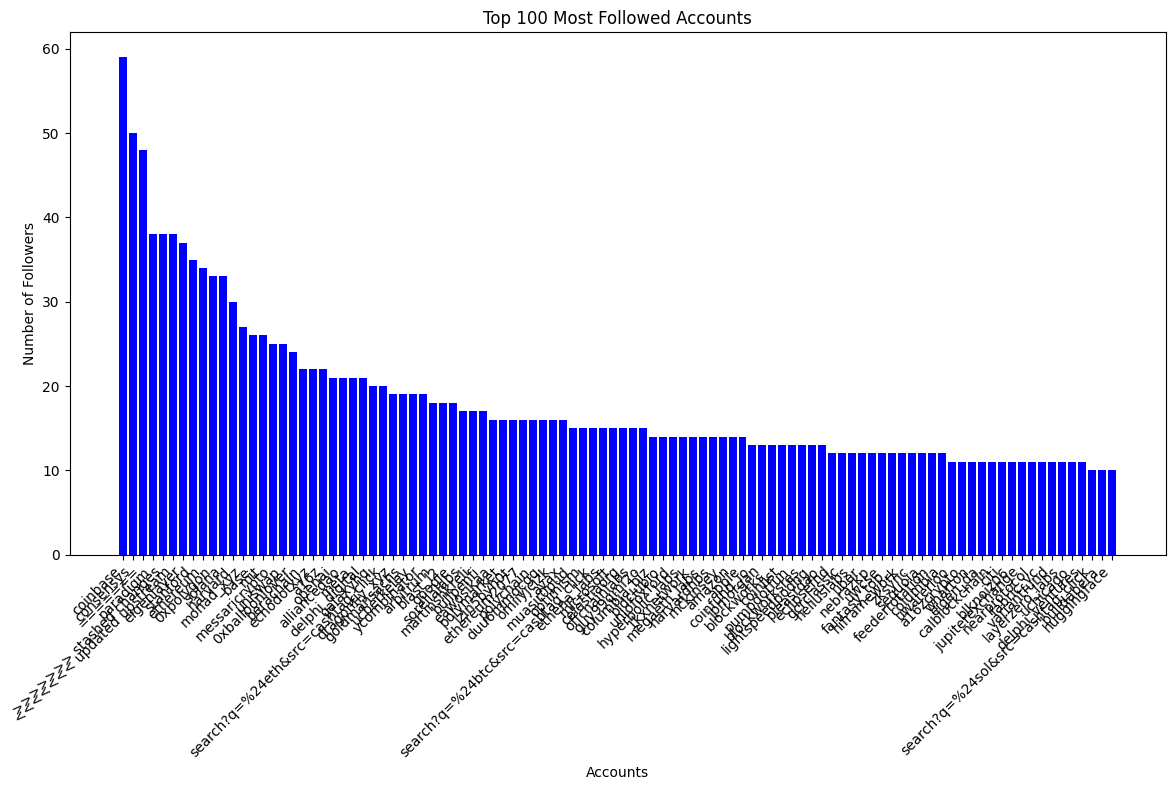

In [31]:
import matplotlib.pyplot as plt


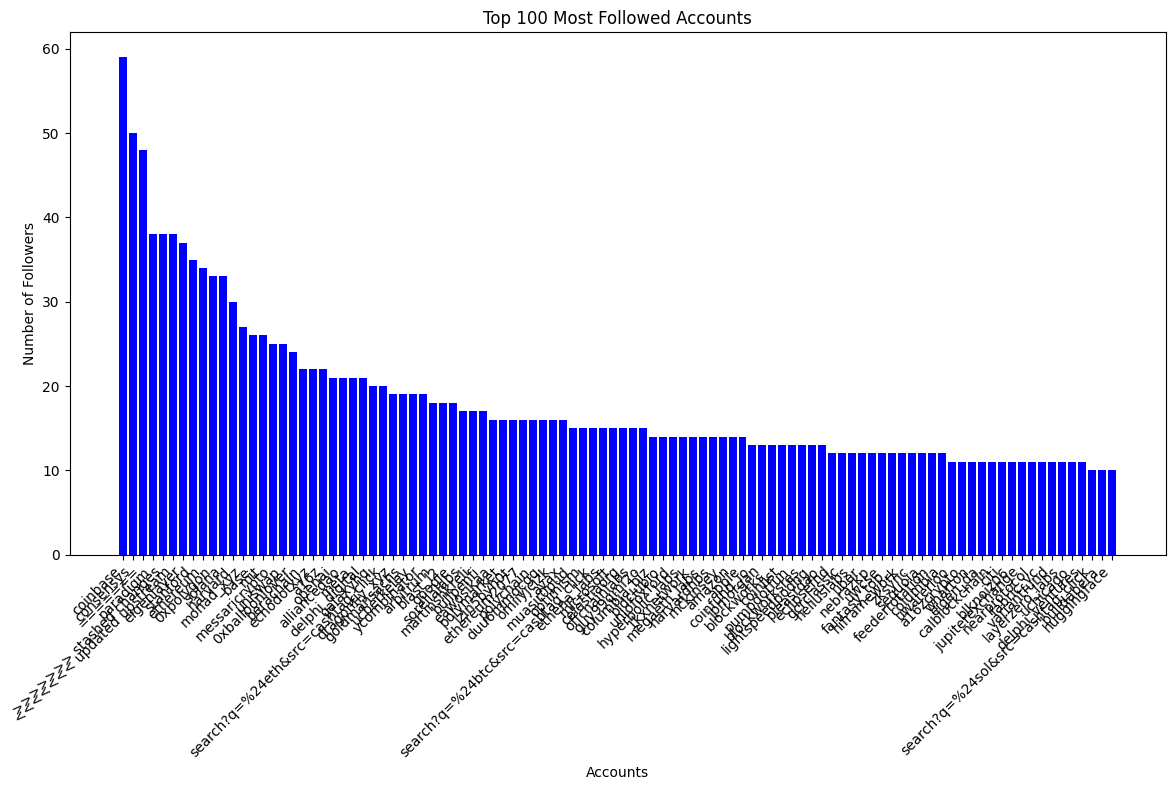

In [32]:

def plot_most_followed_accounts(df, top_n=100):
    # Assuming 'df' has columns 'account' and 'follower_count'
    top_accounts = df.head(top_n)
    plt.figure(figsize=(12, 8))
    plt.bar(top_accounts['account'], top_accounts['follower_count'], color='blue')
    plt.xlabel('Accounts')
    plt.ylabel('Number of Followers')
    plt.title('Top {} Most Followed Accounts'.format(top_n))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the most followed accounts
plot_most_followed_accounts(ranked_accounts)


In [39]:

def get_followers_count_by_date(incremental_updates_file):
    # Read the incremental updates CSV file
    df = pd.read_csv(incremental_updates_file)
    
    # Convert the 'timestamp' column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Extract the date from the timestamp
    df['date'] = df['timestamp'].dt.date
    
    # Group by 'date' and count the number of new followers added each date
    followers_count_by_date = df.groupby('date').size().reset_index(name='new_followers')
    
    # Pivot the table to have dates as columns and the number of new followers as values
    followers_count_pivot = followers_count_by_date.pivot_table(index=None, columns='date', values='new_followers', fill_value=0)
    
    return followers_count_pivot

# Example usage
incremental_updates_file = 'incremental_updates_list.csv'
followers_count_by_date_df = get_followers_count_by_date(incremental_updates_file)
print(followers_count_by_date_df)


date           2024-04-05  2024-04-08  2024-04-17  2024-05-03  2024-05-08  \
new_followers      8952.0     11827.0      9034.0      4798.0      1364.0   

date           2024-05-10  2024-05-15  2024-05-20  
new_followers       366.0      1131.0      1150.0  


In [34]:
import matplotlib.dates as mdates


In [ ]:

def plot_followers_over_time(df, account):
    # Filter the dataframe for the specific account
    account_df = df[df['account'] == account]
    
    # Convert the 'timestamp' column to datetime
    account_df['timestamp'] = pd.to_datetime(account_df['timestamp'])
    
    # Sort the dataframe by timestamp
    account_df = account_df.sort_values(by='timestamp')
    
    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(account_df['timestamp'], account_df['follower_count'], marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Number of Followers')
    plt.title(f'Number of Followers Over Time for {account}')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_269297/726604207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_df['timestamp'] = pd.to_datetime(account_df['timestamp'])


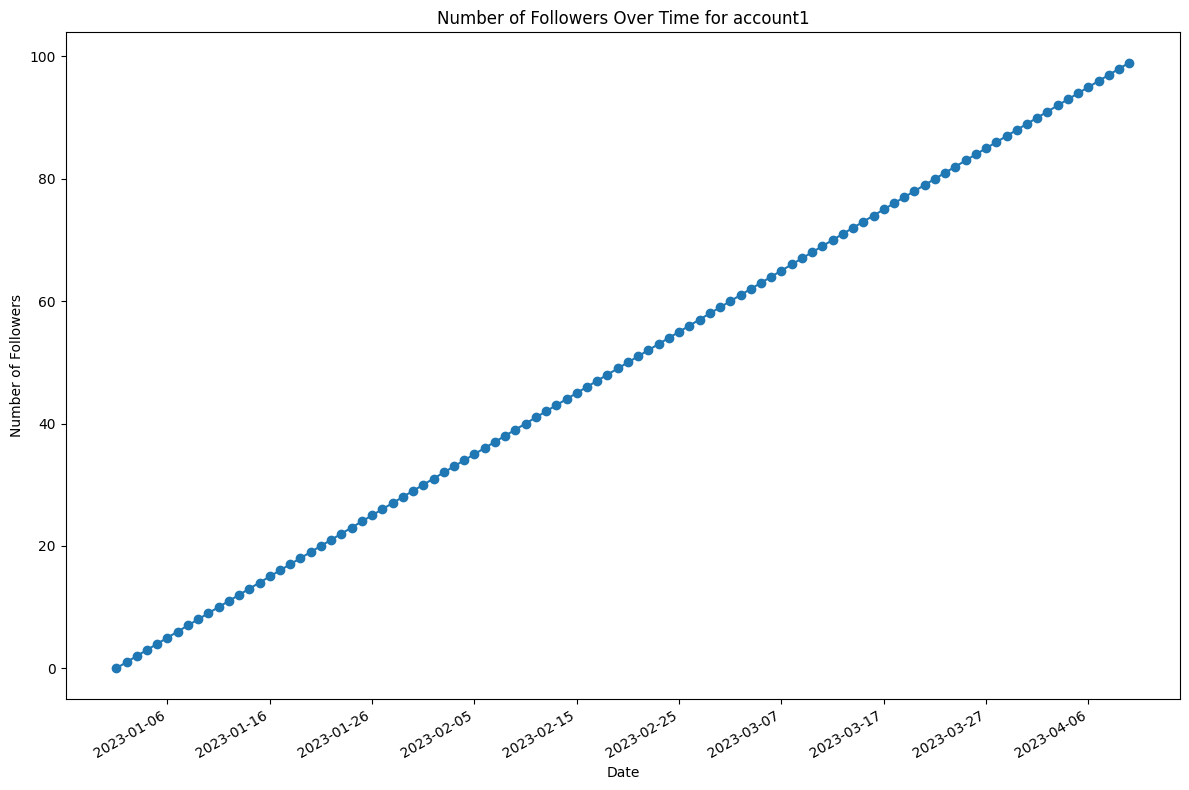

/tmp/ipykernel_269297/726604207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_df['timestamp'] = pd.to_datetime(account_df['timestamp'])


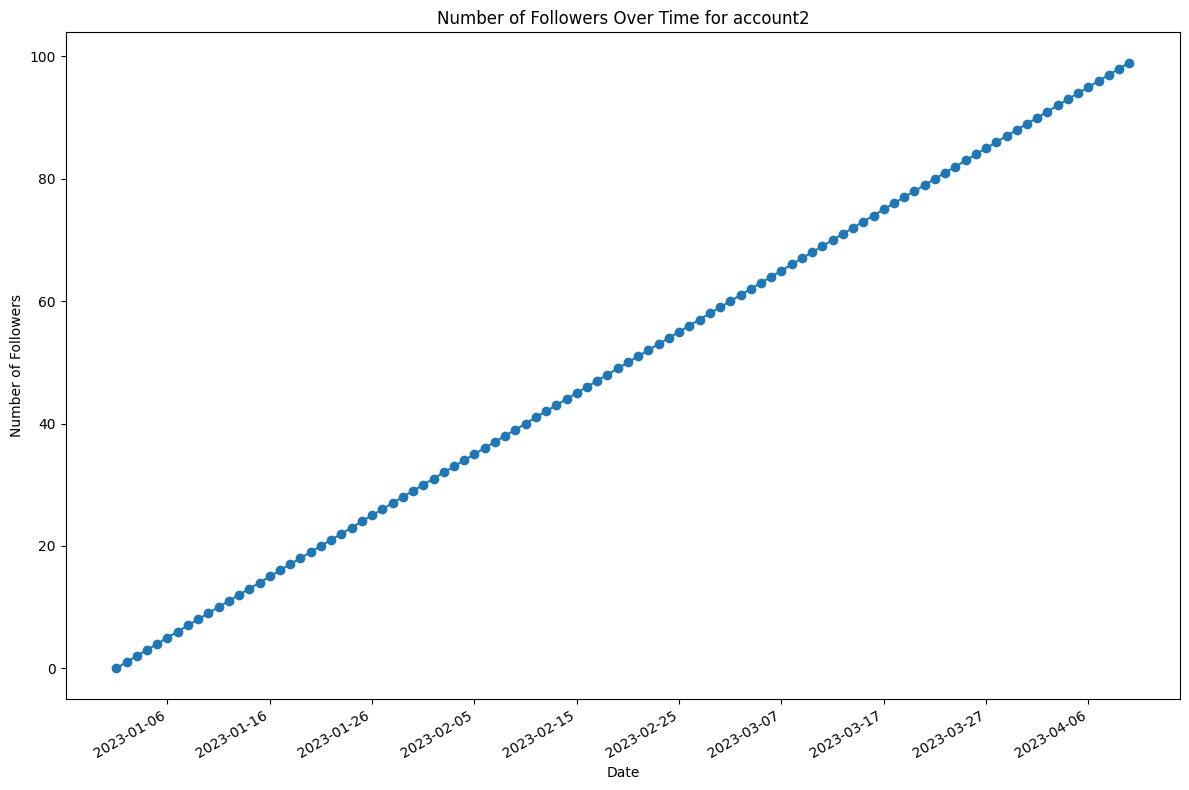

/tmp/ipykernel_269297/726604207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_df['timestamp'] = pd.to_datetime(account_df['timestamp'])


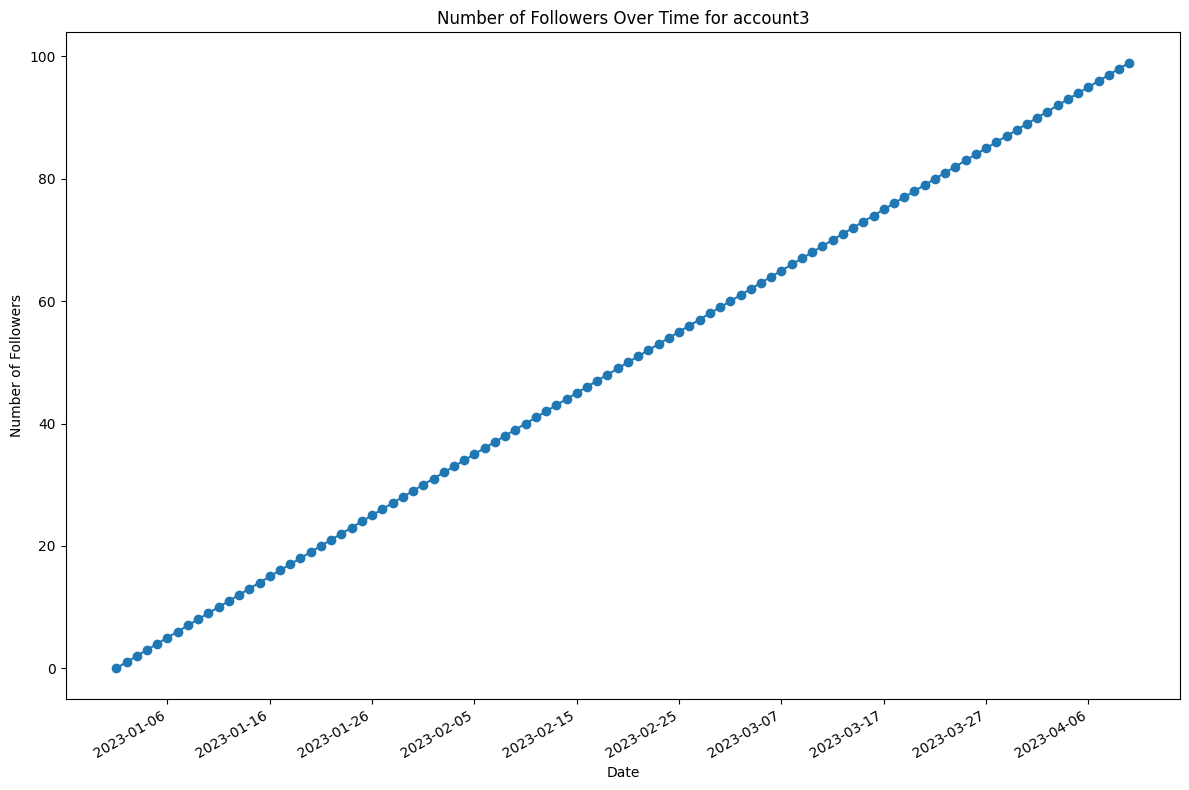

In [36]:
# Create a DataFrame with columns 'timestamp', 'account', and 'follower_count' for multiple accounts
accounts = ['account1', 'account2', 'account3']
data = []

for account in accounts:
    for i in range(100):
        data.append({
            'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D')[i],
            'account': account,
            'follower_count': i
        })

followers_over_time_df = pd.DataFrame(data)

# Now call the function for each account
for account in accounts:
    plot_followers_over_time(followers_over_time_df, account)
